In [39]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings("ignore")

In [35]:
X, _ = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=0.5,random_state=0)

In [36]:
X

array([[-1.16706993,  2.79367261],
       [ 1.45131429,  4.22810872],
       [-1.51353482,  3.00960739],
       ...,
       [ 1.23378487,  0.69462776],
       [-2.02992244,  2.50710735],
       [ 1.58152322,  1.01988539]])

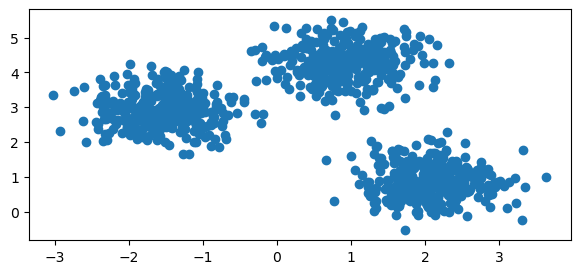

In [37]:
plt.figure(figsize=(7,3))
plt.scatter(X[: , 0] , X[: , 1]);

In [40]:
model = KMeans(n_clusters=3)
model.fit(X)

KMeans(n_clusters=3)

In [42]:
label = model.labels_

In [51]:
center = model.cluster_centers_
center

array([[ 0.91374352,  4.27817158],
       [ 2.09149851,  0.88277136],
       [-1.54973205,  2.93199032]])

In [44]:
df = pd.DataFrame(X , columns=["x1" , "x2"])
df.head()

,x1,x2
0,-1.167070,2.793673
1,1.451314,4.228109
2,-1.513535,3.009607
3,-1.317977,2.897873
4,-2.029065,2.418786


In [45]:
df["label"] = label

In [46]:
df.head()

,x1,x2,label
0,-1.167070,2.793673,2
1,1.451314,4.228109,0
2,-1.513535,3.009607,2
3,-1.317977,2.897873,2
4,-2.029065,2.418786,2


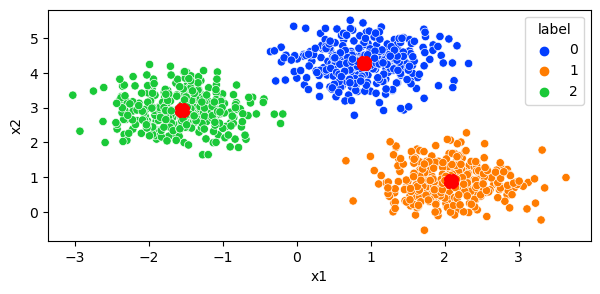

In [67]:
plt.figure(figsize=(7,3))
sns.scatterplot(data = df , x = 'x1' , y = 'x2' , hue = 'label' , palette = "bright")
plt.scatter(center[: , 0] , center[: , 1] , marker = "X" , color = "red" , linewidths=5)
plt.show()

In [68]:
df[df["label"]==0]

,x1,x2,label
1,1.451314,4.228109,0
6,0.105092,3.652166,0
7,0.123135,5.279175,0
9,1.635839,3.862578,0
13,0.412857,3.938448,0
...,...,...,...
955,0.842268,4.705016,0
961,0.453643,4.909360,0
964,1.054523,4.419878,0
972,1.097329,3.859427,0


In [79]:
def elbow_method(data):
    inertia = []
    k = range(1 , 11)
    for i in k:
        model = KMeans(n_clusters= i)
        model.fit(data)
        inertia.append(model.inertia_)
    plt.figure(figsize=(6,3))
    plt.plot(k , inertia  , marker = "*" , color = "red")
    plt.title("Select N_Cluster")
    plt.ylabel("inertia")
    plt.xlabel("N_Cluster")
    plt.show()

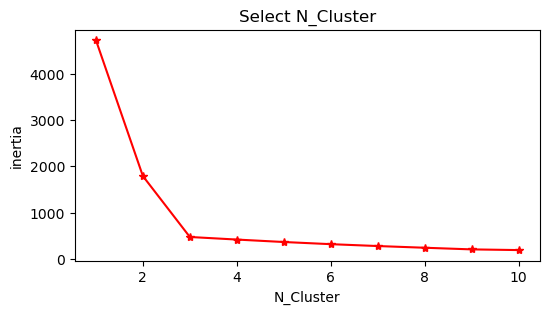

In [80]:
elbow_method(X)